### The central motivation behind this project is to accurately predict a book's genre given its title, rating, author's name, etc.

In [1]:
import pandas as pd

df_books = pd.read_csv('book_data.csv')
df_books.head()

Unnamed: 0                                              title  rating  \
0           0              Sapiens: A Brief History of Humankind    4.39   
1           1  Guns, Germs, and Steel: The Fates of Human Soc...    4.04   
2           2            A People's History of the United States    4.07   
3           3  The Devil in the White City: Murder, Magic, an...    3.99   
4           4                          The Diary of a Young Girl    4.18   

                name num_ratings num_reviews num_followers  \
0  Yuval Noah Harari    8,06,229      46,149         30.5k   
1      Jared Diamond    3,67,056      12,879         6,538   
2        Howard Zinn    2,24,620       6,509         2,354   
3        Erik Larson    6,13,157      36,644         64.2k   
4         Anne Frank   33,13,033      35,591         4,621   

                                            synopsis    genre  
0  100,000 years ago, at least six human species ...  history  
1  "Diamond has written a book of remarkable scop...  history  
2  In the book, Zinn presented a different side o...  history  
3  Author Erik Larson imbues the incredible event...  history  
4  Discovered in the attic in which she spent the...  history

- create 100 new columns for each of the top 10 most common words (10 words per genre, 10 genres)
- everytime that word appears in the synopsis, add 1 to column
- perform scale normalization (divide by std)
- pass the 100 new columns into x_feat_list for random forest classifier

In [2]:
import numpy as np

genres = np.unique(df_books["genre"])
genres

array(['fantasy', 'history', 'horror', 'psychology', 'romance', 'science',
       'science_fiction', 'sports', 'thriller', 'travel'], dtype=object)

In [3]:
from nltk.corpus import stopwords

# create set of stop words
stop_words = set(stopwords.words('english'))

# list of more common words
# includes words that were common across all genres -- took out these words to increase accuracy of classifier

common_words = ["the", "of", "and", "a", "to", "in", "is", "you", "that", "it", "he",
                "was", "for", "on", "are", "as", "with", "his", "they", "I", "at",
                "be", "this", "have", "from", "or", "one", "had", "by", "word", "but",
                "not", "what", "all", "were", "we", "when", "your", "can", "said",
                "there", "use", "an", "each", "which", "she", "do", "how", "their",
                "if", "will", "up", "other", "about", "out", "many", "then", "them",
                "these", "so", "some", "her", "would", "make", "like", "him", "into",
                "time", "has", "look", "two", "more", "write", "go", "see", "number",
                "no", "way", "could", "people", "my", "than", "first", "water", "been",
                "call", "who", "oil", "its", "now", "find", "long", "down", "day", "did",
                "get", "come", "made", "may", "part", "less", "even", "must", "us", "new", 
                "also", "every", "world", "life", "never", "ever", "set", "knows", "know", 
                "wants", "past", "book", "he’s", "hes", "she’s", "it’s", "de", "ender"]


Text(0.5, 0.98, 'Top 10 Common Words by Genre')

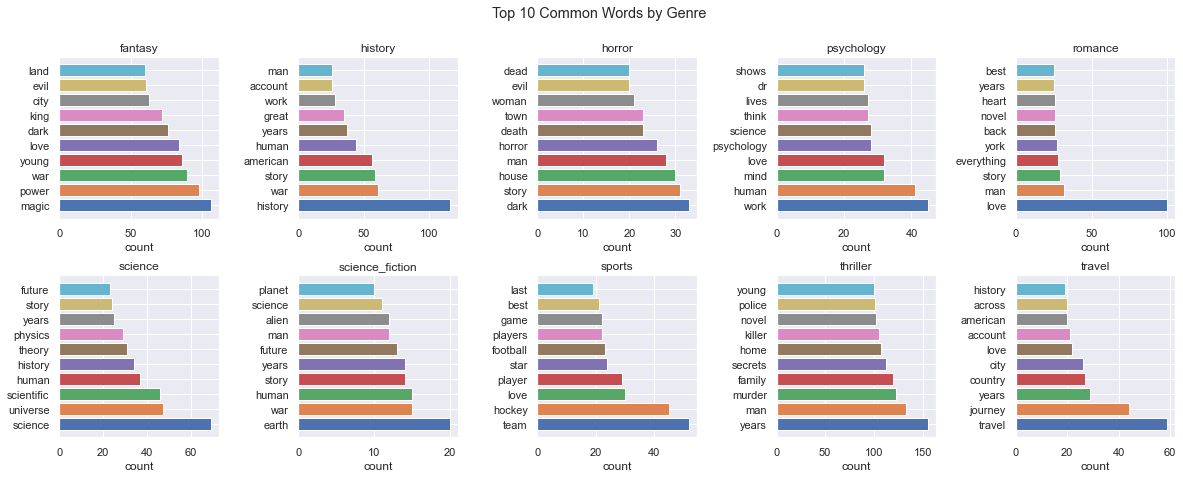

In [4]:
import string
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

# master list of top 10 common words per genre; should contain 100 words
top_words = list()

for genre in range(len(genres)):
    # boolean index to get data per genre
    genre_bool = df_books["genre"] == genres[genre]
    genre_filtered = df_books.loc[genre_bool, :]

    # clean each synopsis
    
    # list of lists; each list is a synopsis for 1 book
    synopsis_list = list()

    for synopsis in genre_filtered['synopsis']:
        synopsis = synopsis.replace('\n', ' ')
        # cast synopsis str to list
        synopsis = synopsis.split()
        synopsis_list.append(synopsis)
        
    # list of lists; each list is a synopsis for 1 book, each list element is a word in the synopsis
    clean_synopsis_list = list()

    # remove all puctuation from synopsis
    for synopsis in synopsis_list:
        temp_list = list()
        for word in synopsis:
            for letter in word:
                if letter in string.punctuation:
                    word = word.replace(letter, '')
                    
            # skip over word (don't append) if blank     
            if word != '':
                # append lowercase version of word
                temp_list.append(word.lower())

        clean_synopsis_list.append(temp_list)
    
    # create word count dict from all synopsis's in genre
    
    # initialize word count dict
    genre_synopsis = defaultdict(lambda: 0)

    for synopsis in clean_synopsis_list:
        for word in synopsis:
            # check if word is a stop word
            if word not in stop_words:
                if word not in common_words:
                    genre_synopsis[word] += 1

    # sort dict from biggest to smallest value
    genre_synopsis = dict(sorted(genre_synopsis.items(), key=lambda x: x[1], reverse=True))
    
    for word in list(genre_synopsis.keys())[:10]:
        # add top 10 common words to master list (top_words)
        top_words.append(word)
        
        # add columns to df_books for every word in top 10 common words
        df_books[f'synopsis_{word}'] = 0
    
    # plot graph
    sns.set(font_scale = 1)
    # activate a specific subplot
    plt.subplot(2, 5, genre + 1)
    
    # only plot the top 10 most common words (first 10 items in genre_synopsis dict)
    for word, count in list(genre_synopsis.items())[:10]:
        plt.barh(word, count)
        
    plt.title(genres[genre])
    plt.xlabel('count')
    
# resizes the whole figure .set_size_inches(width_inches, height_inches) 
plt.gcf().set_size_inches(20, 7)
# adjust spacing between graphs
plt.subplots_adjust(wspace=.5, hspace=.35)
plt.suptitle('Top 10 Common Words by Genre')


In [14]:
# functions created by atharva inamdar: https://www.kaggle.com/code/athu1105/data-cleaning

import re

def rev_clean(s):
    # re.sub(pattern, replacement, string, count=0, flags=0)
    s = re.sub(r'[,a-zA-Z]', "", s) # Removing comma and any letter if present
    return int(s)


def foll_clean(s):
    #re.sub(pattern, replacement, string, count=0, flags=0)
    if s[-1] == 'k':
        s = re.sub(r'[,a-zA-Z]', "", s)
        return int(float(s[:-1]) * 1000)
    else:
        s = re.sub(r'[,a-zA-Z]', "", s)
        return int(s)
    
def object_to_float(s):
    return float(s)

In [15]:
# clean num_ratings and num_reviews column by removing commas and letters
df_books["num_ratings"] = df_books["num_ratings"].apply(rev_clean)
df_books["num_reviews"] = df_books['num_reviews'].apply(rev_clean)

# clean num_followers column by adj format (ex. 400k --> 400000), removing commas and letters
df_books['num_followers'] = df_books['num_followers'].apply(foll_clean)

# cast values in rating column from objects to floats
df_books['rating'] = df_books['rating'].apply(object_to_float)

Text(0.5, 1.0, 'Average Num of Ratings by Genre')

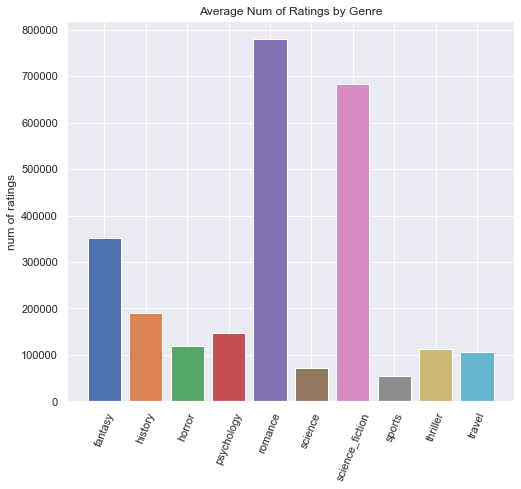

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale = 1)

for genre in range(len(genres)):
    # boolean index to get data per genre
    genre_bool = df_books['genre'] == genres[genre]
    genre_filtered = df_books.loc[genre_bool, :]

    # compute avg number of ratings
    mean = genre_filtered['num_ratings'].mean()
    
    # plot graphs
    plt.bar(genres[genre], mean)
    plt.xticks(rotation = 68)
    
# resizes the whole figure .set_size_inches(width_inches, height_inches) 
plt.gcf().set_size_inches(8, 7)
plt.ylabel('num of ratings')
plt.title('Average Num of Ratings by Genre')
    
  

In [ ]:
# clean each synopsis

# list of lists; each list is a synopsis for 1 book
synopsis_list = list()

for synopsis in df_books['synopsis']:
    synopsis = synopsis.replace('\n', ' ')
    # cast synopsis str to list
    synopsis = synopsis.split()
    synopsis_list.append(synopsis)
    
# list of lists; each list is a synopsis for 1 book, each list element is a word in the synopsis
clean_synopsis_list = list()

# remove all puctuation from synopsis
for synopsis in synopsis_list:
    temp_list = list()
    for word in synopsis:
        for letter in word:
            if letter in string.punctuation:
                word = word.replace(letter, '')

        # skip over word if blank     
        if word != '':
            # append lowercase version of word
            temp_list.append(word.lower())

    clean_synopsis_list.append(temp_list)
    
# check for top 10 common words in a book's synopsis 
for synopsis_idx in range(len(clean_synopsis_list)):
    for word in clean_synopsis_list[synopsis_idx]:
        # check if word from synopsis is in list of top 10 common words
        if word in top_words:
            
            # increase value for specific book ([row that book is in, column of common word])
            df_books.loc[synopsis_idx, f'synopsis_{word}'] += 1



In [20]:
from collections import defaultdict

# initialize a dict containing a uniform weight for each class (book genre) 
# uncommon books will have larger weights; common books will have smaller weights
class_weight_dict = defaultdict(lambda: 0)

for genre in range(len(genres)):
    # boolean index to get data per genre
    genre_bool = df_books["genre"] == genres[genre]
    genre_filtered = df_books.loc[genre_bool, :]
    
    # total num of books in genre
    num_books = genre_filtered.shape[0]
    
    # key - book genre
    # value - weight to assign to all books in a book genre
    class_weight_dict[genres[genre]] = 1 / num_books
    
class_weight_dict

defaultdict(<function __main__.<lambda>()>,
            {'fantasy': 0.0028735632183908046,
             'history': 0.010101010101010102,
             'horror': 0.01,
             'psychology': 0.010101010101010102,
             'romance': 0.009009009009009009,
             'science': 0.012658227848101266,
             'science_fiction': 0.022222222222222223,
             'sports': 0.012658227848101266,
             'thriller': 0.002079002079002079,
             'travel': 0.01020408163265306})

In [21]:
from sklearn.model_selection import StratifiedKFold
from copy import copy
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# drop NaN
df_books.dropna(how='any', inplace=True)

max_depth = 3

x_feat_list = ['rating', 'num_ratings', 'num_reviews', 'num_followers']
x_feat_list = x_feat_list + list(df_books.columns[9:])
y_feat = 'genre'

# extract data from dataframe
x = df_books.loc[:, x_feat_list].values
y_true = df_books.loc[:, y_feat].values

# initialize DecisionTreeClassifier
dec_tree_clf = tree.DecisionTreeClassifier(max_depth=max_depth, class_weight=class_weight_dict)

# construction of kfold object
kfold = StratifiedKFold(n_splits=10, shuffle=True)

# allocate an empty array to store predictions in
y_pred = copy(y_true)

for train_idx, test_idx in kfold.split(x, y_true):
    # build arrays which correspond to x, y train /test
    x_test = x[test_idx, :]
    x_train = x[train_idx, :]
    y_true_train = y_true[train_idx]
    
    # fit
    dec_tree_clf = dec_tree_clf.fit(x_train, y_true_train)

    # predict each book's genre
    y_pred[test_idx] = dec_tree_clf.predict(x_test)
    
# plot figure of decision tree
# initialize empty figure (plot_tree sets text size to fill given figure

plt.figure()
plt.gcf().set_size_inches(300, 300)
# plt.figure(figsize=(60, 60))  # set plot size (denoted in inches)

# 'plot' decision tree
tree.plot_tree(dec_tree_clf, fontsize=80,
               feature_names=x_feat_list,
               class_names=dec_tree_clf.classes_)
    

[Text(8370.0, 14269.5, 'num_ratings <= 65394.5\ngini = 0.9\nsamples = 1386\nvalue = [0.902, 0.909, 0.9, 0.899, 0.901, 0.899, 0.889, 0.899\n0.9, 0.898]\nclass = history'),
 Text(4185.0, 10192.5, 'synopsis_team <= 0.5\ngini = 0.858\nsamples = 584\nvalue = [0.115, 0.384, 0.33, 0.495, 0.072, 0.709, 0.0, 0.722\n0.478, 0.745]\nclass = travel'),
 Text(2092.5, 6115.5, 'num_ratings <= 13214.5\ngini = 0.857\nsamples = 539\nvalue = [0.115, 0.384, 0.33, 0.485, 0.063, 0.709, 0.0, 0.354\n0.451, 0.735]\nclass = travel'),
 Text(1046.25, 2038.5, 'gini = 0.453\nsamples = 60\nvalue = [0.0, 0.02, 0.0, 0.071, 0.0, 0.025, 0.0, 0.038, 0.008\n0.429]\nclass = travel'),
 Text(3138.75, 2038.5, 'gini = 0.86\nsamples = 479\nvalue = [0.115, 0.364, 0.33, 0.414, 0.063, 0.684, 0.0, 0.316\n0.443, 0.306]\nclass = science'),
 Text(6277.5, 6115.5, 'synopsis_power <= 0.5\ngini = 0.243\nsamples = 45\nvalue = [0.0, 0.0, 0.0, 0.01, 0.009, 0.0, 0.0, 0.367, 0.027\n0.01]\nclass = sports'),
 Text(5231.25, 2038.5, 'gini = 0.191\ns

In [22]:
from sklearn.model_selection import StratifiedKFold
from copy import copy
from sklearn.ensemble import RandomForestClassifier

# drop NaN
df_books.dropna(how='any', inplace=True)

x_feat_list = ['rating', 'num_ratings', 'num_reviews', 'num_followers']
x_feat_list = x_feat_list + list(df_books.columns[9:])
y_feat = 'genre'

# extract data from dataframe
x = df_books.loc[:, x_feat_list].values
y_true = df_books.loc[:, y_feat].values

# initialize RandomForestClassifier
rf_clf = RandomForestClassifier(class_weight=class_weight_dict)

# construction of kfold object
kfold = StratifiedKFold(n_splits=10, shuffle=True)

# allocate an empty array to store predictions in
y_pred = copy(y_true)

for train_idx, test_idx in kfold.split(x, y_true):
    # build arrays which correspond to x, y train /test
    x_test = x[test_idx, :]
    x_train = x[train_idx, :]
    y_true_train = y_true[train_idx]
    
    # fit
    rf_clf.fit(x_train, y_true_train)

    # predict each book's genre
    y_pred[test_idx] = rf_clf.predict(x_test)
    

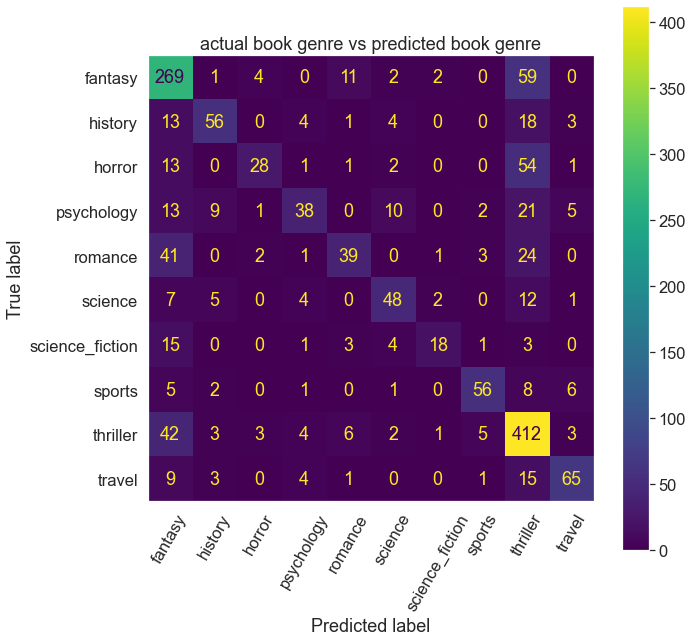

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# build and plot confusion matrix
conf_mat = confusion_matrix(y_true=y_true, y_pred=y_pred)
conf_mat_disp = ConfusionMatrixDisplay(conf_mat, display_labels=np.unique(y_true))

sns.set(font_scale=1.5)
conf_mat_disp.plot()
plt.gcf().set_size_inches(10, 10)
plt.title('actual book genre vs predicted book genre')
plt.xticks(rotation = 60)
plt.grid(False)

In [24]:
from sklearn.metrics import accuracy_score

acc_score = accuracy_score(y_true, y_pred)

acc_score

0.6686159844054581

In [25]:
from collections import defaultdict
from sklearn.metrics import accuracy_score

genres_dict = defaultdict(lambda: 0)

for genre in genres:
    # get the indices per each book genre
    book_genre_idx = np.where(y_true == genre)[0]
    # create new arrays that consist of only that book genre by using the indexes from book_genre_idx
    genre_true = np.take(y_true, book_genre_idx)
    genre_pred = np.take(y_pred, book_genre_idx)
    # compute the accuracy score for a book genre
    acc_score = accuracy_score(genre_true, genre_pred)
    genres_dict[genre] = acc_score
    
genres_dict

defaultdict(<function __main__.<lambda>()>,
            {'fantasy': 0.7729885057471264,
             'history': 0.5656565656565656,
             'horror': 0.28,
             'psychology': 0.3838383838383838,
             'romance': 0.35135135135135137,
             'science': 0.6075949367088608,
             'science_fiction': 0.4,
             'sports': 0.7088607594936709,
             'thriller': 0.8565488565488566,
             'travel': 0.6632653061224489})

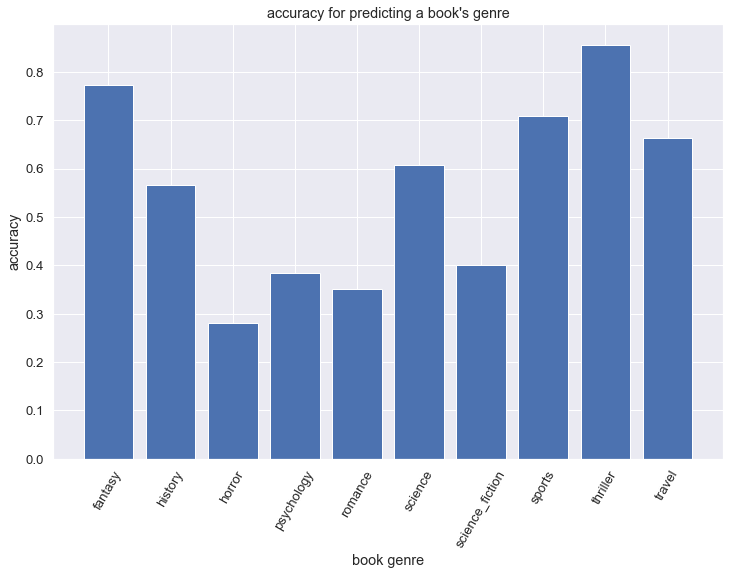

In [26]:
sns.set(font_scale=1.2)

plt.bar(list(genres_dict.keys()), list(genres_dict.values()))
plt.title("accuracy for predicting a book's genre")
plt.xlabel('book genre')
plt.ylabel('accuracy')
plt.xticks(rotation = 60)
plt.gcf().set_size_inches(12, 8)

In [27]:
def plot_feat_import(feat_list, feat_import, sort=True, limit=None):
    """ plots feature importances in a horizontal bar chart
    
    Args:
        feat_list (list): str names of features
        feat_import (np.array): feature importances (mean gini reduce)
        sort (bool): if True, sorts features in decreasing importance
            from top to bottom of plot
        limit (int): if passed, limits the number of features shown
            to this value    
    """
    
    if sort:
        # sort features in decreasing importance
        idx = np.argsort(feat_import).astype(int)
        feat_list = [feat_list[_idx] for _idx in idx]
        feat_import = feat_import[idx] 
        
    if limit is not None:
        # limit to the first limit feature
        feat_list = feat_list[:limit]
        feat_import = feat_import[:limit]
    
    # plot and label feature importance
    plt.barh(feat_list, feat_import)
    plt.gcf().set_size_inches(5, len(feat_list) / 2)
    plt.xlabel('Feature importance\n(Mean decrease in Gini across all Decision Trees)')


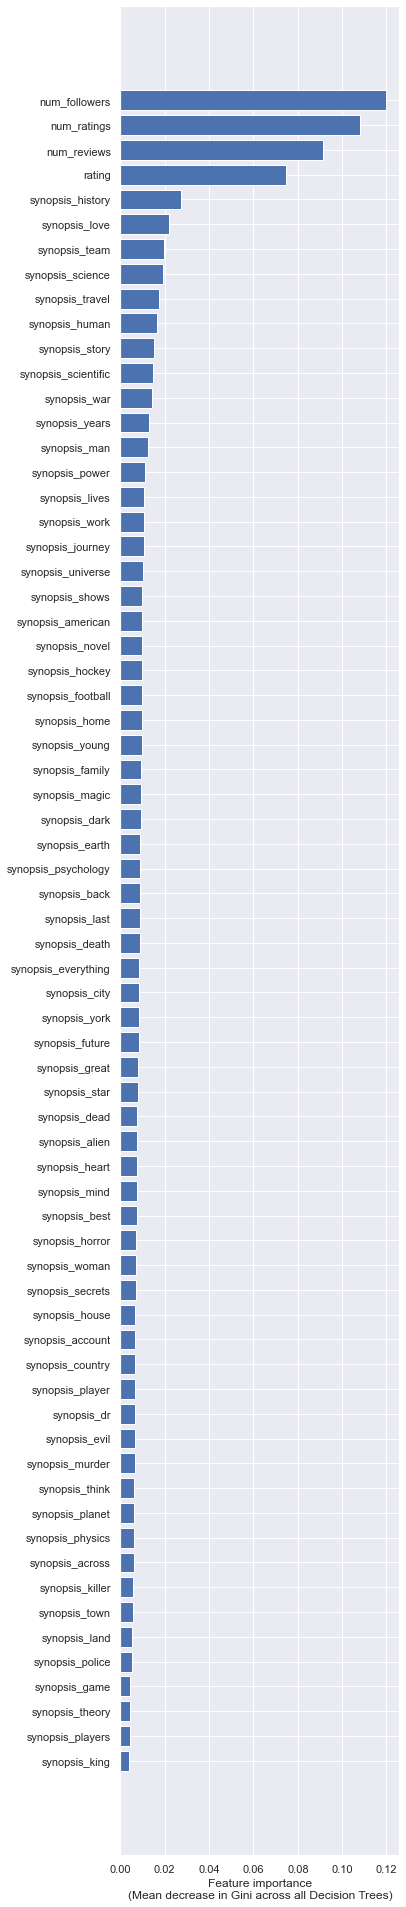

In [28]:
import numpy as np
import seaborn as sns

sns.set()

plot_feat_import(x_feat_list, rf_clf.feature_importances_)

